# EX 3

### EX 1

The time it takes a student to complete a TOLC-I, University orientation and evaluation test follows a density function of the form

$$
f(X) =
\begin{cases}
c(t-1)(2-t), \quad & 1 < t < 2\\
0 \quad &\text{otherwise}
\end{cases}
$$

where $t$ is the time in hours.

###### (a) 
using the integrate() R function, determine the constant $c$ (and verify it analytically)

In [252]:
my_density_not_norm <- function(t) {
    value <- ifelse(t <= 1 | t >= 2,
    0,
    (t-1)*(2-t))
    return (value)
}
 
normalization <- integrate(my_density_not_norm, lower = -Inf, upper=Inf)
normalization


my_density <- function(t) {
    value <- ifelse(t<= 1 | t>=2,
    0,
    (1/normalization$value)*(t-1)*(2-t))
    return (value)
}

0.1666667 with absolute error < 7.1e-05

$$ 1 = \int_{-\infty}^{\infty} f(X) dX = c \int_{1}^{2} (t-1)(2-t) dt = c \int_{1}^{2} 3t-2-t^2 dt = c \int_{1}^{2} \frac{3}{2}t^2-2t-\frac{1}{3}t^3 dt = \frac{c}{6} \rightarrow c=6$$

###### (b)
write the set of four R functions and plot the pdf and cdf, respectively

In [253]:
dmy_pdf <- my_density

In [254]:
pmy_pdf <- function(x) {
  value <- ifelse(x<1,
  0,
  ifelse(x<=2,
  9*x*x-12*x-2*x*x*x+5,
  1))
  return (value)
}

In order to calculate the q/r, the acceptance rejection method will be used.

The pdf is defined an nonzero in [1,2]. Its maximum is in $t=1.5$, where $f(t)=\frac{3}{2}$.

In [255]:
rmy_pdf <- function(x) {

    ################
    # CALCULATIONS #
    ################     
    # setting the limits
    a <- 1
    b <- 2        
    pdf.max <- 1.5
    # since the efficiency is not 1 (it is actually 2/3), 10 times the required points are extracted 
    # just to be sure
    n <- 10*x 
    #drawing the random numbers
    u.1 <- runif(n, a, b)
    u.2 <- runif(n, 0, 1)
    y <- ifelse(u.2 * pdf.max < dmy_pdf(u.1), u.1, NA)
    y.clean <- y[!is.na(y)]   
    # the function is automatically re-invoked in the case of a failure in creating at least x draws
    #otherwise it is returned
    ifelse(length(y.clean)<x, rmy_pdf(x), out<-y.clean[1:x])
    return (out)
}

In [256]:
find.index <- function(x){
    return (which.min(x>values)-1)
}

helper_func1 <- function(x){   
        a<-1
        values <- pmy_pdf(seq(1,2,0.0001)) #computes the values of the cdf with steps of 0.0001 
        indexes <- which.min(x>values)-1
        return (a+indexes*0.0001)
}

qmy_pdf <- function(x){
    ifelse(all(0<=x&x<=1),
           
        return (sapply(x, helper_func1)),
           
        "Error: the quantile must be in [0,1]")
           
}

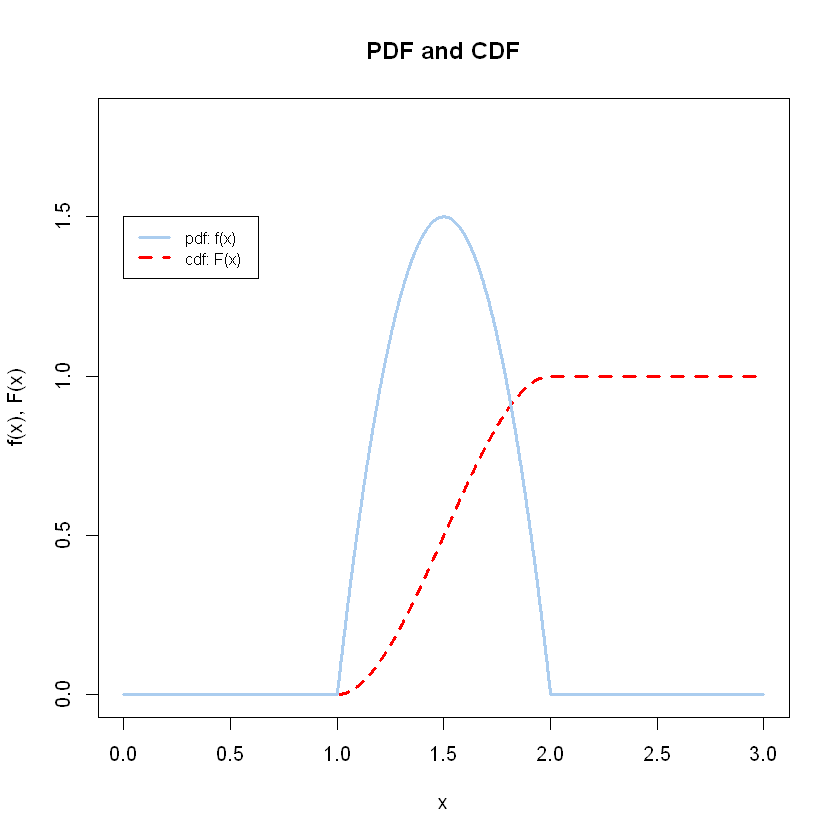

In [270]:
#plotting
xs <- seq(0,3,0.001)

plot(xs, pmy_pdf(xs), type='l', main="PDF and CDF",
    xlab="x", ylab="f(x), F(x)", ylim=c(0,1.8), col = "red", lwd=3, lty=2)
lines(xs, dmy_pdf(xs), col = "#ABCDEF", lwd=3)

#adding legend
legend(0, 1.5, legend=c("pdf: f(x)", "cdf: F(x)"),
       col=c("#ABCDEF", "red"), lty=1:2, lwd=3, cex=0.8)



###### (c)
evaluate the probability that the student will finish the aptitude test in more than 75 minutes.  And that it will take 90 and 120 minutes.

In [192]:
prob_more_than_75_mins <- 1-pmy_pdf(1.25)
prob_between_90_120 <- pmy_pdf(2)-pmy_pdf(1.5)
cat("Prob. of taking more than 75 minutes:",prob_more_than_75_mins)
cat("\n")
cat("Prob. of taking between 90 and 120 minutes:",prob_between_90_120)

Prob. of taking more than 75 minutes: 0.84375
Prob. of taking between 90 and 120 minutes: 0.5

### EX 2

The lifetime of tires sold by an used tires shop is $10^4· X km$, where $x$ is a random variable following the distribution function

$$
f(X) =
\begin{cases}
\frac{2}{x^2}, \quad & 1 < x < 2\\
0 \quad &\text{otherwise}
\end{cases}
$$

###### (a)
write the set of four R functions and plot the pdf and cdf, respectively

In [1]:
#pdf
df <- function(x) {
    ifelse(1<x&2>x,
          return (2/(x*x)),
          return (0))
}

df<- Vectorize(df)

normalization <- integrate(Vectorize(df), lower = -Inf, upper=Inf)
normalization

1 with absolute error < 7.4e-05

In [289]:
#cdf
pf <- function(x) {
    ifelse(x<1,
          return (0),
          ifelse(x<2,
                return (2*(1-1/x)),
                return (1)
                )
          )
}
pf <- Vectorize(pf)

In [290]:
#sampling
rf <- function(n) {
    a <- 1
    b <- 2
    f.max <- 2
    
    x <- 10*n
    u1 <- runif(x, a, b)
    u2 <- runif(x, 0, f.max)
    
    y <- ifelse(u2<df(u1), u1, NA)
    y.clean <- y[!is.na(y)]
    
    ifelse(length(y.clean)<n, rf(n), out<-y.clean[1:n])
    return (out)
}

In [291]:
#quantile
qf <- function(x) {
    
    ifelse(all(0<=x&x<=1),
           
        return (2/(2-x)),
           
        NA)
}
qf <- Vectorize(qf)

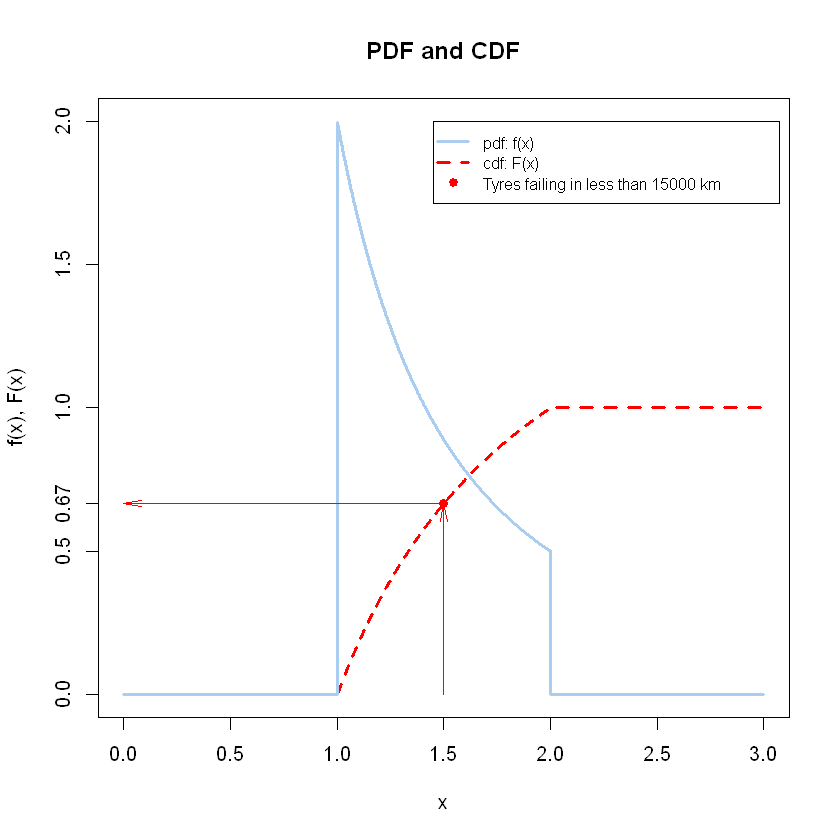

In [322]:
#plotting
xs <- seq(0,3,0.001)

plot(xs, pf(xs), type='l', main="PDF and CDF",
    xlab="x", ylab="f(x), F(x)", ylim=c(0,2), col = "red", lwd=3, lty=2)
lines(xs, df(xs), col = "#ABCDEF", lwd=3)

#prob of a tyre lasting less than 15000 km
points(1.5, pf(1.5), col='red', pch = 19)
arrows(1.5, 0, y1=pf(1.5), length = 0.15, angle = 10, code = 2, col = 'red')
arrows(1.5, pf(1.5), 0, pf(1.5), length = 0.15, angle = 10, code = 2, col = 'red')

#adding a tick where the value of the probability is
axis(side=2, at=pf(1.5), labels=format(round(pf(1.5), 2)))

#adding legend
legend(1.45, 2, legend=c("pdf: f(x)", "cdf: F(x)", "Tyres failing in less than 15000 km"),
       col=c("#ABCDEF", "red", "red"), lty=c(1,2,0), lwd=3, cex=0.8, pch = c(NA, NA, 19))

###### (b)
determine the probability that tires will last less than 15000 km

In [297]:
# the probability that the tyres will last less than 15000 km 
# is equal to the value of the cdf at 1.5
cat("The probability of a tyre lasting less than 15000 km is", pf(1.5))

The probability of a tyre lasting less than 15000 km is 0.6666667

###### (c)
sample 3000 random variables from the distribution and determine the mean value and the variance,using the expression 
$\text{Var}(X) =E\left[X^2\right]−E\left[X\right]^2$

In [334]:
N <- 3000
samples <- rf(N)

mean <- mean(samples)
variance <- mean(samples**2)-(mean(samples))**2

cat("The mean is",round(mean,4))
cat("\n\nThe variance is",round(variance,3))

The mean is 1.3906

The variance is 0.079

### EX 3

Markov’s inequality represents an upper boud to probability distributions:
$$
P(X \geq k) \leq \frac{E[X]}{k} \quad \quad \text{for} \quad k>0
$$
Having a dunction defined as
$$
G(k) = 1-F(k) \equiv P(X \geq k)
$$
plot $G(k)$ and the Markov’s upper bound for:

###### (a)
the exponential, $\text{Exp}(\lambda= 1)$, distribution function

In [424]:
G1 <- function(x) {
    return(1-pexp(x))
}

Markov1 <- function(x) {
    return(1/x)
}

###### (b)
the uniform, $\mathcal{U}(3,5)$, distribution function:

In [425]:
G2 <- function(x) {
    return(1-punif(x,3,5))
}

Markov2 <- function(x) {
    return(4/x)
}

###### (c)
the binomial, $\mathcal{B}(n=1, p=1/2)$, distribution function:

In [426]:
G3 <- function(x) {
    return(1-pbinom(x, 1, .5))
}

Markov3 <- function(x) {
    return(1*.5/x)
}

###### (d)
a Poisson, $\text{Pois}(\lambda=1/2)$, distribution function:

In [427]:
G4 <- function(x) {
    return(1-ppois(x, 0.5))
}

Markov4 <- function(x) {
    return(0.5/x)
}

###### Plot

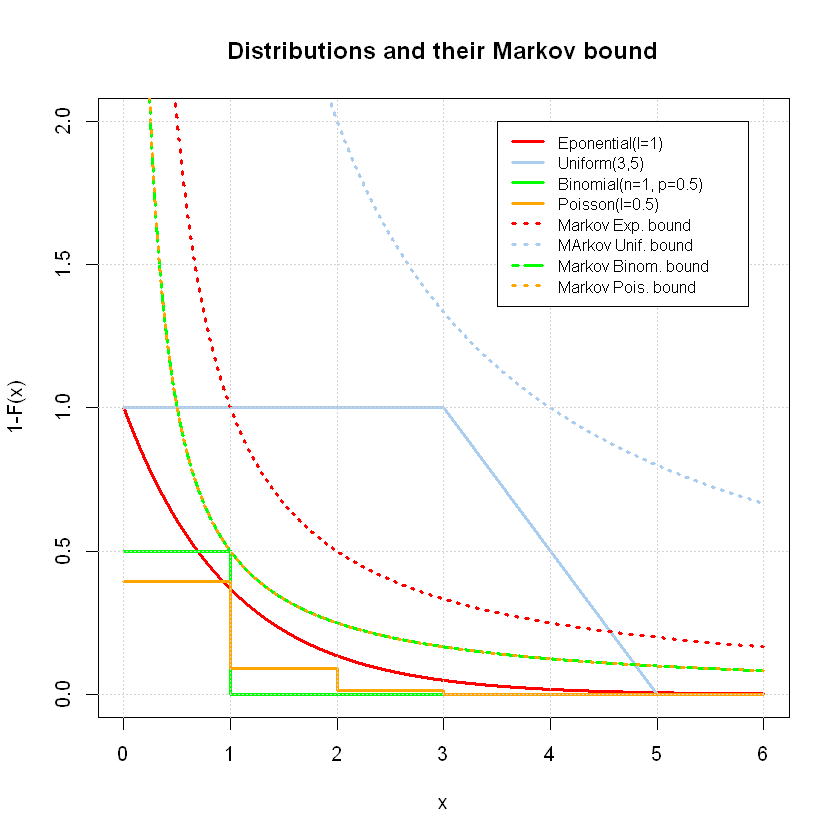

In [429]:
xs <- seq(0,6,0.001)

plot(xs, G1(xs), type='l', main="Distributions and their Markov bound",
    xlab="x", ylab="1-F(x)", ylim=c(0,2), col = "red", lwd=3, lty=1)
lines(xs, G2(xs), col = "#ABCDEF", lwd=3, lty=1)
lines(xs, G3(xs), col = "green", lwd=3,lty=1)
lines(xs, G4(xs), col = "orange", lwd=3,lty=1)
#bounds
lines(xs, Markov1(xs), col = "red", lwd=3, lty=3)
lines(xs, Markov2(xs), col = "#ABCDEF", lwd=3, lty=3)
lines(xs, Markov3(xs), col = "green", lwd=3,lty=6)
lines(xs, Markov4(xs), col = "orange", lwd=3,lty=3)

grid()

#adding legend
legend(3.5, 2, legend=c("Eponential(l=1)", "Uniform(3,5)", "Binomial(n=1, p=0.5)", "Poisson(l=0.5)",
                        "Markov Exp. bound", "MArkov Unif. bound", 
                         "Markov Binom. bound", "Markov Pois. bound"),
       col=c("red", "#ABCDEF", "green", "orange"), lty=c(1,1,1,1,3,3,6,3), lwd=3, cex=0.8)

### EX 4

Chebyshev’s inequality tells us that
$$
P\left( \left| X - \mu \right| \geq k \sigma \right) \leq \frac{1}{k^2}
$$
which can be written as 
$$
P\left(\left| \frac{X-\mu}{\sigma}\right|<k\right) \geq 1 - \frac{1}{k^2}
$$
use  R  to  show,  with  a  plot,  that  Chebyshev’s  inequality  is an  upper  bound  to  the  following distributions:

* a normal distribution, $\mathcal{N}(\mu=, \sigma=5)$;
* an exponential distribution, $\text{Exp}(\lambda=1)$;
* a uniform distribution, $\mathcal{U}(1-\sqrt(2), 1+\sqrt(2))$;
* a Poisson distribution, $\text{Pois}(\lambda = 1/3)$.

In [430]:
# mu = 3
# sigma = 5
normal <- function(x) {
    return(pnorm((5*x+3),3,5)-pnorm(3-5*x,3,5))
}

# mu = 1/lambda
# sigma = 1/lambda^2
exponential <- function(x) {
    return(pexp(1+x)-pexp(1-x))
}

# mu = 0
# sigma = (b^2+a^2-ab)/3
uniform <- function(x) {
    sigma <- 5/3
    return(punif(x*sigma, min=1-2**.5, max=1+2**.5)-punif(-x*sigma, min=1-2**.5, max=1+2**.5))
}

# mu = 1/lambda
# sigma = 1/lambda
poisson <- function(x) {
    return(ppois(x*3+3,1/3)-ppois(3-x*3,1/3))
}

#defining the Chebyshev bounds
cheb <- function(x) {
    return (1-(1/x**2))
}

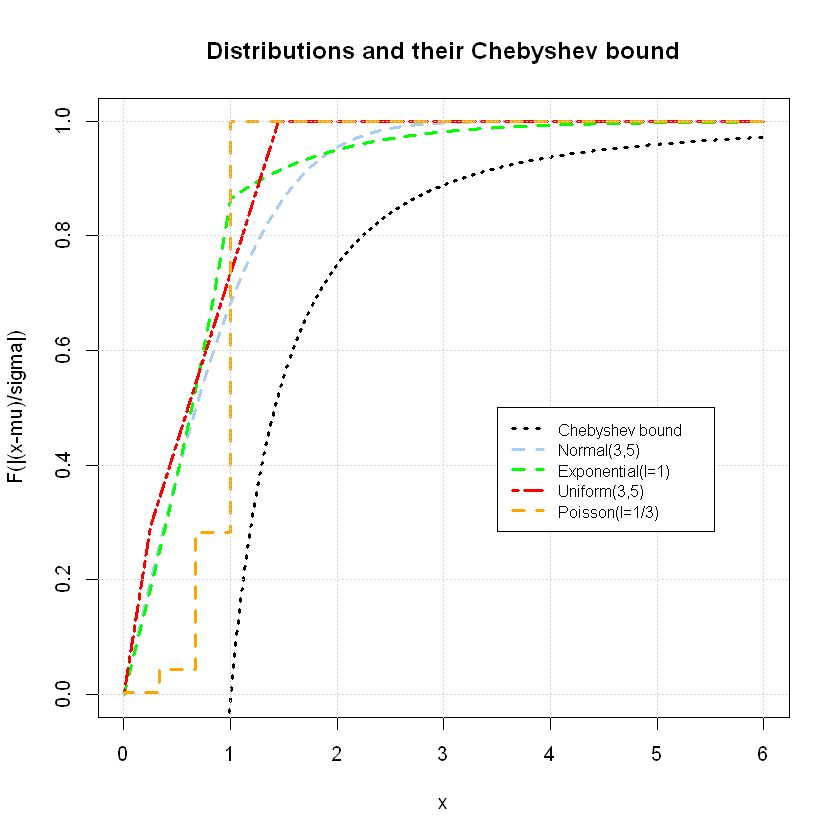

In [431]:
xs <- seq(0,6,0.001)

plot(xs, cheb(xs), type='l', main="Distributions and their Chebyshev bound",
    xlab="x", ylab="F(|(x-mu)/sigma|)", ylim=c(0,1), col = "black", lwd=3, lty=3)

lines(xs, normal(xs), col = "#ABCDEF", lwd=3, lty=2)
lines(xs, exponential(xs), col = "green", lwd=3,lty=2)
lines(xs, uniform(xs), col = "red", lwd=3,lty=6)
lines(xs, poisson(xs), col = "orange", lwd=3,lty=2)
grid()

#adding legend
legend(3.5, 0.5, legend=c("Chebyshev bound", "Normal(3,5)", "Exponential(l=1)", "Uniform(3,5)",
                        "Poisson(l=1/3)"),
       col=c("black", "#ABCDEF", "green", "red", "orange"), lty=c(3,2,2,6,2), lwd=3, cex=0.8)
